In [186]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
df = pd.read_csv("./train.csv")
df_f = df[df['Sex'] == "female"]
df_m = df[df['Sex'] == "male"]

In [ ]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [ ]:
df.groupby(['Sex']).Age.value_counts()

Sex     Age 
female  24.0    16
        18.0    13
        22.0    12
        30.0    11
        35.0     8
                ..
male    57.0     1
        66.0     1
        70.5     1
        74.0     1
        80.0     1
Name: Age, Length: 145, dtype: int64

In [ ]:
pd.crosstab(df.Sex, df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,19.00,20.00,20.50,21.00,22.00,23.00,23.50,24.00,24.50,25.00,26.00,27.00,28.00,28.50,29.00,30.00,...,36.00,36.50,37.00,38.00,39.00,40.00,40.50,41.00,42.00,43.00,44.00,45.00,45.50,46.00,47.00,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,55.50,56.00,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,0,0,2,0,0,2,6,2,5,4,2,1,2,4,1,1,0,2,4,1,4,6,6,13,7,2,0,7,12,5,0,16,0,5,5,6,7,0,7,11,...,7,0,1,5,6,6,0,4,3,2,3,6,0,0,2,4,2,5,1,2,1,3,1,0,1,1,3,0,1,0,1,2,0,0,0,0,0,0,0,0
male,1,1,0,2,1,5,4,4,5,0,1,2,2,4,1,3,1,0,2,0,1,11,7,13,18,13,1,17,15,10,1,14,1,18,13,12,18,2,13,14,...,15,1,5,6,8,7,2,2,10,3,6,6,2,3,7,5,4,5,6,4,0,5,1,1,3,1,2,2,3,3,3,0,2,3,1,2,1,2,1,1


In [ ]:
df_m['Age'].mode()

0    19.0
1    25.0
2    28.0
dtype: float64

In [ ]:
df_f['Age'].mode()

0    24.0
dtype: float64

In [190]:
df['Sex_Category'] = df['Sex'].apply(lambda x: 1 if x == "female" else 0)

In [191]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Normalized,Fare_Normalized,Sex_Category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.139136,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.103644,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.673285,0.101229,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.044986,0.032596,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.723549,0.051822,1


In [8]:
#using scikit learn preprocessing to scale in the range [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
df[['Age_Normalized','Fare_Normalized']] = min_max_scaler.fit_transform(df[['Age','Fare']])

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Category,Age_Normalized,Fare_Normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531,0.015713
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,NaN,0.016510
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0.673285,0.101229
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0.019854,0.041136
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0.334004,0.021731
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0.170646,0.058694


In [ ]:
df['Age_Normalized'] = df['Age'].apply(lambda x: (x - df['Age'].mean()) / df['Age'].std())
df['Fare_Normalized'] = df['Fare'].apply(lambda x: (x - df['Fare'].mean()) / df['Fare'].std())

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Category,Age_Normalized,Fare_Normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,-0.530005,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.571430,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,-0.254646,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.364911,0.420494
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.364911,-0.486064


In [ ]:
def logistic_fn(x):
  return 1.0 / (1.0 + np.exp(-x))

In [ ]:
logistic_fn(1)

0.7310585786300049

In [35]:
df.dropna(inplace=True)

In [192]:
x_train, x_test, y_train, y_test = train_test_split(df[['Age_Normalized','Fare_Normalized','Sex_Category']],df[['Survived']],test_size=0.1,random_state = 2)

In [193]:
y_test['Survived'].value_counts()

1    12
0     7
Name: Survived, dtype: int64

In [194]:
log_reg = LogisticRegression(class_weight={1:0.37,0:0.7})
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight={0: 0.7, 1: 0.37}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
titanic_predictions = log_reg.predict(x_test)
print(classification_report(y_test,titanic_predictions))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.89      0.67      0.76        12

    accuracy                           0.74        19
   macro avg       0.74      0.76      0.73        19
weighted avg       0.78      0.74      0.74        19



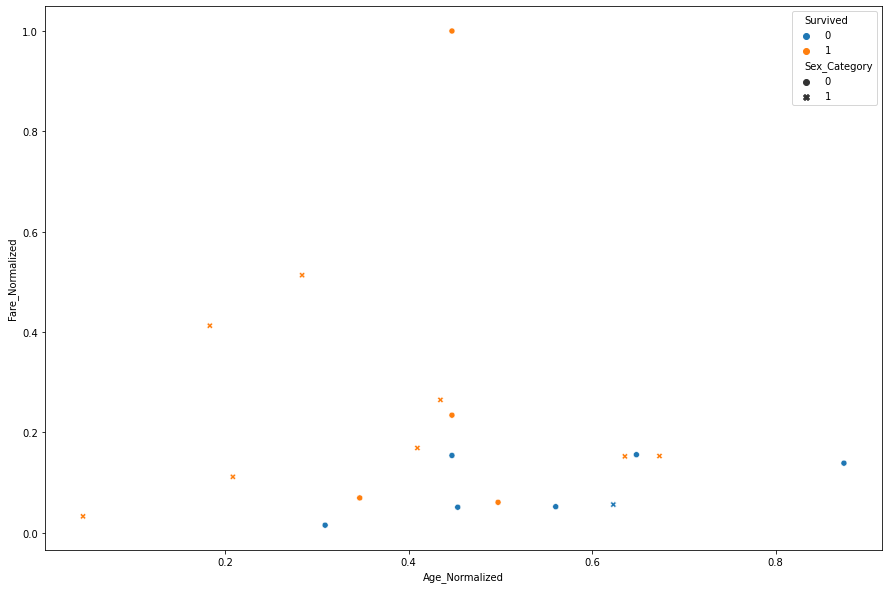

In [222]:
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test, x = 'Age_Normalized', y = 'Fare_Normalized', hue=y_test['Survived'], style=x_test['Sex_Category'])

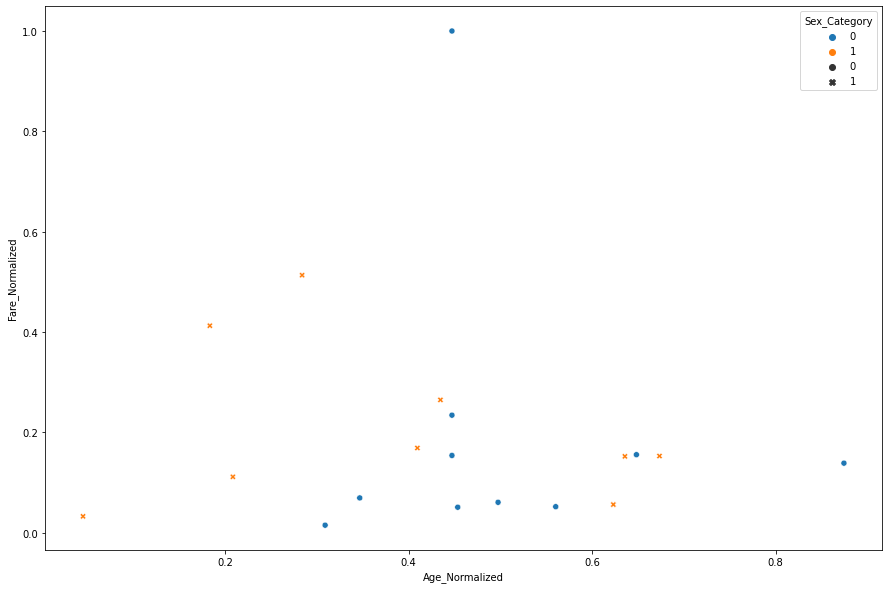

In [223]:
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test, x = 'Age_Normalized', y = 'Fare_Normalized', hue=titanic_predictions, style=x_test['Sex_Category'])

<Figure size 1080x720 with 0 Axes>

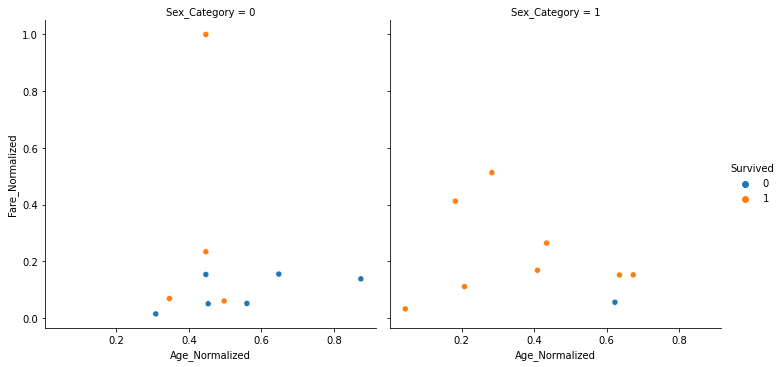

In [224]:
# can visualize better using a relplot instead
plt.figure(figsize=(15,10))
sb.relplot(data = x_test, x = 'Age_Normalized', y = 'Fare_Normalized', col=x_test['Sex_Category'], hue=y_test['Survived'])

<Figure size 1080x720 with 0 Axes>

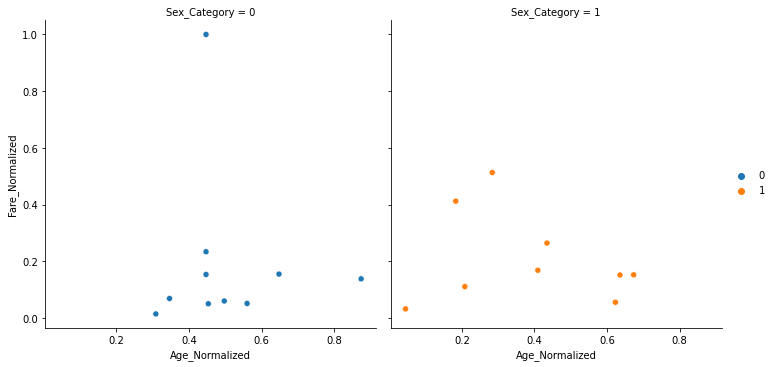

In [225]:
plt.figure(figsize=(15,10))
sb.relplot(data = x_test, x = 'Age_Normalized', y = 'Fare_Normalized', col=x_test['Sex_Category'], hue=titanic_predictions)